In [12]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# описание данных https://ggplot2.tidyverse.org/reference/diamonds.html
df = sns.load_dataset('diamonds') # загрузим датасет 
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
# определите, сколько алмазов какого cut находятся в таблице
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [9]:
# df.groupby('cut')['carat'].count()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: carat, dtype: int64

In [17]:
plt.style.use('ggplot')

In [24]:
values = df['cut'].value_counts().values
values

array([21551, 13791, 12082,  4906,  1610], dtype=int64)

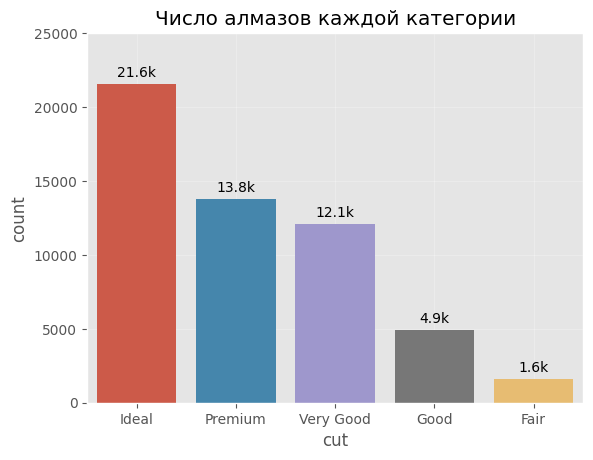

In [26]:
sns.countplot(data=df, x='cut')
plt.title('Число алмазов каждой категории')
plt.ylim(0, 25000)

for x, y in zip(range(5), values):
    plt.text(x, y + 500, f"{y/1000:.1f}k", ha='center')
    
plt.grid(alpha=0.25)
plt.show()

In [27]:
# определите встерчаемость цветов в таблице (сколько раз встретился каждый цвет)
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [40]:
# определите самый популярный цвет для каждого cut
#
tmp = df[['cut', 'color']].value_counts()
tmp.name = 'count'
tmp = tmp.reset_index()
tmp.head(2)
# подсказка
# можно сгруппировать по cut и color сразу. а дальше, например, count и nlargest

,cut,color,count
0,Ideal,G,4884
1,Ideal,E,3903


In [42]:
tmp['color_rank'] = tmp.groupby('cut')['count'].rank(ascending=False)
tmp.head(2)

,cut,color,count,color_rank
0,Ideal,G,4884,1.0
1,Ideal,E,3903,2.0


In [43]:

tmp[tmp['color_rank'] == 1]

,cut,color,count,color_rank
0,Ideal,G,4884,1.0
4,Premium,G,2924,1.0
6,Very Good,E,2400,1.0
18,Good,E,933,1.0
27,Fair,G,314,1.0


In [44]:
# встречаемость
tmp = df[['cut', 'color']].value_counts()
tmp.name = 'count'
tmp = tmp.reset_index()
tmp.head(2)

,cut,color,count
0,Ideal,G,4884
1,Ideal,E,3903


In [47]:
tmp['max_count'] = tmp.groupby('cut')['count'].transform('mean')
tmp.head(5)

,cut,color,count,max_count
0,Ideal,G,4884,4884
1,Ideal,E,3903,4884
2,Ideal,F,3826,4884
3,Ideal,H,3115,4884
4,Premium,G,2924,2924


In [48]:
tmp[tmp['count'] == tmp['max_count']]

,cut,color,count,max_count
0,Ideal,G,4884,4884
4,Premium,G,2924,2924
6,Very Good,E,2400,2400
18,Good,E,933,933
27,Fair,G,314,314


In [49]:
# представим, что нашим алмазы -- прямоугольные параллелепипеды. 
# тогда объём алмаза -- произведение трех его измерений (x, y, z)
# создайте столбец V со значанием объёма алмаза
df['V'] = df.x * df.y * df.z
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,V
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [54]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
V           float64
dtype: object

In [57]:
# отфильтруйте те строки в датафрейме, для которых среднее значение carat в их группе cut больше 0.85
#
df.groupby('cut').filter(lambda x: x['carat'].mean() > 0.85)

,carat,cut,color,clarity,depth,table,price,x,y,z,V
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,36.425214
12,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33,34.715136
14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27,32.262375
...,...,...,...,...,...,...,...,...,...,...,...
53928,0.79,Premium,E,SI2,61.4,58.0,2756,6.03,5.96,3.68,132.254784
53930,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49,115.988754
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43,112.813386
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,116.721246


In [58]:
# для каждой группы по cut посчитайте в одну таблицу (сразу же, за 1 шаг)
# среднее и медианное значение price, размах (минимум минус максимум) и максимальное значение
df.groupby('cut')['price'].agg(
    MEAN=np.mean,
    MEDIAN=np.median,
    RANGE=lambda x: x.max() - x.min(),
    MAX=np.max,
)

,MEAN,MEDIAN,RANGE,MAX
cut,,,,
Ideal,3457.541970,1810.0,18480,18806
Premium,4584.257704,3185.0,18497,18823
Very Good,3981.759891,2648.0,18482,18818
Good,3928.864452,3050.5,18461,18788
Fair,4358.757764,3282.0,18237,18574


In [60]:
# в исходном датафрейме создайте столбец max_price со значением максимальной цены для алмаза из группы по cut
# то есть, если первые две строки относятся к группе Good, то у них в столбце max_price стоит цена самого дорогого
# алмаза из группы Good
df['max_price'] = df.groupby('cut')['price'].transform(np.max)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,V,max_price
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,18806
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,18823
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,18788
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,18823
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,18788


In [65]:
# создайте столбец relative_max, где записано, какую долю (в процентах) от максимальной цены алмаза внутри группы по cut
# составляет цена этого алмаза
# то есть если алмаз на 30 строке стоит 0.5 единиц, а самый дорогой алмаз для его гурппы по cut стоит 2 ед.,
# то тогда в столбце relative_max должно находиться 25
df['relative_price'] = ((df.price / df.max_price) * 100).round(2)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,V,max_price,relative_price
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,18806,1.73
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,18823,1.73
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,18788,1.74
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,18823,1.77
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,18788,1.78


In [66]:
df['relative_price'] = ((df.price / df.groupby('cut')['price'].transform(np.max)) * 100).round(2)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,V,max_price,relative_price
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,18806,1.73
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,18823,1.73
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,18788,1.74
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,18823,1.77
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,18788,1.78


In [69]:
df.drop('max_price', axis=1).head(3) # не in place

,carat,cut,color,clarity,depth,table,price,x,y,z,V,relative_price
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,1.73
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,1.73
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,1.74


In [70]:
df.drop(columns=['max_price']).head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z,V,relative_price
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,1.73
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,1.73
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,1.74
